In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
pd.set_option('use_inf_as_na', True)
from collections import Counter

In [2]:
raw_data = pd.read_pickle(r'C:\Users\niels\OneDrive\Machine Learning 2022\Lecture 2\dataset.pkl')

In [3]:
data = raw_data[raw_data['market_cap'] > 1000.0]

In [4]:
data = data.copy()
data.fillna(0.0,inplace=True)

In [5]:
def f(x):
    if x > 0.01:
        return 1
    elif x < -0.01:
        return -1
    else:
    
        return 0

In [6]:
data['rel_performance'] = data['pred_rel_return'].apply(f)

In [7]:
data.reset_index(inplace=True,)
data.set_index('date',inplace=True)

In [8]:
data.head()

,ticker,actq,apq,atq,ceqq,cheq,cogsq,csh12q,cshfdq,cshiq,...,sector_code_817.0,sector_code_822.0,sector_code_823.0,sector_code_825.0,sector_code_830.0,sector_code_835.0,sector_code_840.0,sector_code_845.0,sector_code_850.0,rel_performance
date,,,,,,,,,,,,,,,,,,,,,
2000-02-09,CSCO,7722.000,482.000,21391.000,16523.000,3968.000,1422.000,3374.1250,3648.000,3445.000,...,0,0,0,0,0,0,0,0,0,-1
2000-02-09,ROP,172.725,19.662,474.649,239.432,3.198,47.634,30.2688,31.217,0.000,...,0,0,0,0,0,0,0,0,0,1
2000-02-10,CMOS,240.767,27.044,376.536,209.411,68.625,43.023,21.4360,23.753,0.000,...,0,0,0,0,0,0,0,0,0,1
2000-02-11,DELL,7681.000,3538.000,11471.000,5308.000,4132.000,5452.000,2536.0000,2731.000,2575.000,...,0,0,0,0,0,0,0,0,0,1
2000-02-15,VAL,507.082,139.497,1094.080,402.382,27.605,221.366,43.1858,43.687,53.321,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df_1 = data.loc['2010-01-01':'2013-01-01']
df_2 = data.loc['2010-04-01':'2013-04-01']

In [10]:
df_valid_1 = data.loc['2013-04-01':'2013-07-01']
df_valid_2 = data.loc['2013-07-01':'2013-10-01']
df_test_2 = data.loc['2013-10-01':'2014-01-01']

In [11]:
train_1 = df_1.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)
train_2 = df_2.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)

valid_2 = df_valid_2.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)
test = df_test_2.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1)

In [12]:
train_1_stock_returns = df_1['next_period_return']
valid_2_stock_returns = df_valid_2['next_period_return']
train_2_stock_returns = df_2['next_period_return']
test_stock_returns = df_test_2['next_period_return']

In [13]:
y_1 = df_1['rel_performance']
y_2 = df_2['rel_performance']
y_valid_2 = df_valid_2['rel_performance']
y_test_2 = df_test_2['rel_performance']

In [14]:
y_1 = y_1.values
y_2 = y_2.values
y_valid_2 = y_valid_2.values
y_test_2 = y_test_2.values

In [15]:
t_clf = DecisionTreeClassifier(max_depth=8,min_samples_leaf=800)

In [16]:
bg_clf = BaggingClassifier(t_clf,n_estimators=40,oob_score=True,random_state=123,n_jobs=1)

In [17]:
bg_clf.fit(train_2,y_2)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                        min_samples_leaf=800),
                  n_estimators=40, n_jobs=1, oob_score=True, random_state=123)

In [18]:
bg_clf.score(train_2,y_2)

0.5380619052827299

In [19]:
bg_clf.score(valid_2,y_valid_2)

0.4714047751249306

In [20]:
pred_valid = bg_clf.predict(valid_2)

In [21]:
Counter(pred_valid)

Counter({1: 1211, -1: 590})

In [22]:
Counter(y_valid_2)

Counter({1: 850, -1: 789, 0: 162})

In [23]:
bg_clf.oob_score_

0.5132888548616428

In [24]:
confusion_matrix(y_valid_2,pred_valid)

array([[268,   0, 521],
       [ 53,   0, 109],
       [269,   0, 581]], dtype=int64)

In [25]:
def baggingtree_feat_importance(m, df):
    feature_importances = []
    for est in m.estimators_:
        fi = est.feature_importances_
        feature_importances.append(fi)
    feature_importances = np.array(feature_importances)
        
    return pd.DataFrame({'cols':df.columns, 'feat_imp':np.mean(feature_importances,axis=0)}
                       ).sort_values('feat_imp', ascending=False)

def plot_fi(fi): return fi.plot('cols', 'feat_imp', 'barh', figsize=(12,7), legend=False)

In [26]:
fi = baggingtree_feat_importance(bg_clf,train_2)

In [40]:
features = fi[(fi['feat_imp'] > 0.01)]
features

,cols,feat_imp
181,fqtr_3,0.138184
108,dprq,0.047923
86,dvpspq,0.039597
171,rect_turnq,0.039001
158,lt_ppentq,0.038472
155,fcf_csfhdq,0.036959
170,at_turnq,0.031045
95,evmq,0.030836
156,fcf_yield,0.023770
79,revty,0.022953


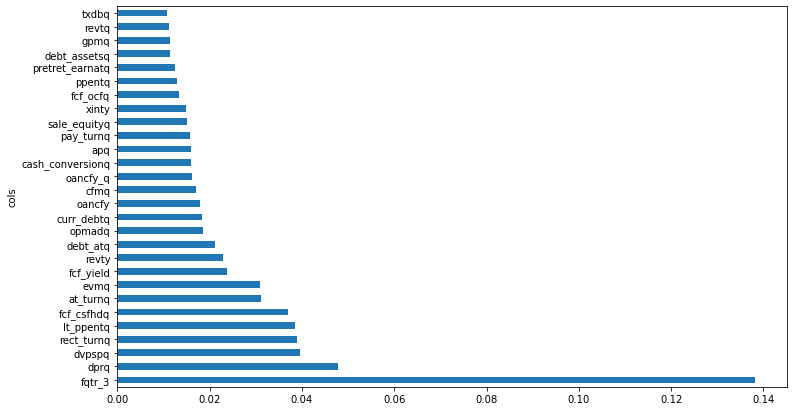

In [41]:
plot_fi(features);

In [42]:
len(features['cols'].values)

28

In [43]:
train_2 = train_2[features['cols'].values]
valid_2 = valid_2[features['cols'].values]

In [44]:
bg_clf.fit(train_2,y_2)
bg_clf.score(train_2,y_2)

0.5332494804768676

In [45]:
pred_valid = bg_clf.predict(valid_2)
bg_clf.score(valid_2,y_valid_2)

0.4652970571904497

In [46]:
bg_clf.oob_score_

0.5171716066936454

In [47]:
(pred_valid * valid_2_stock_returns).sum()

40.163678999999924

In [48]:
def profit_importance(t,df,rets):
#     np.random.seed(123)
    profit = []
    for col in df.columns:
        prof = []
        for _ in range(20):
            X = df.copy()
            X[col] = np.random.permutation(df[col].values)
            prediction = t.predict(X)
            prof.append((prediction * rets).sum())
        profit.append(np.mean(prof))
    return profit

In [49]:
def baggingtree_profit_importance(m, df,rets):
    return pd.DataFrame({'cols':df.columns, 'pi_imp':profit_importance(m,df,rets)}
                       ).sort_values('pi_imp', ascending=True)

In [50]:
%time pi = baggingtree_profit_importance(bg_clf,valid_2,df_valid_2['next_period_return'])
pi

Wall time: 7.83 s


,cols,pi_imp
7,evmq,32.455255
6,at_turnq,36.408883
17,apq,36.705618
9,revty,36.925620
23,pretret_earnatq,37.293968
5,fcf_csfhdq,37.658130
10,debt_atq,37.778807
27,txdbq,39.150414
11,opmadq,39.425794
26,revtq,39.431669


In [ ]:

profits = []

feat=[]

train = train_2.copy()
validation = valid_2.copy()

while len(train.columns)>1:
    
    bg_clf.fit(train,y_2)
    pi = baggingtree_profit_importance(bg_clf,validation,y_valid_2)

    col_to_drop = pi[pi['pi_imp'] == pi['pi_imp'].max()]['cols'].iloc[0]
    train.drop(col_to_drop,axis=1,inplace=True)
    validation.drop(col_to_drop,axis=1,inplace=True)
    bg_clf.fit(train,y_2)
    
    fi = baggingtree_feat_importance(bg_clf,train)
    features = fi[(fi['feat_imp'] > 0.00)]
    train = train[features['cols'].values]
    validation = validation[features['cols'].values]
    bg_clf.fit(train,y_2)
    
    pred_valid = bg_clf.predict(validation)
    profits.append((pred_valid * df_valid_2['next_period_return']).sum())
    print((pred_valid * df_valid_2['next_period_return']).sum())
    feat.append(features['cols'].values) 

            

42.469880999999944
65.0623489999999
67.1994169999999
67.4966549999999
64.38532099999989
65.08732099999992
66.39466499999992


In [ ]:
plt.plot(profits);

In [ ]:
n = np.argmax(profits)
optim_feats = feat[n]
max_profits = profits[n]

In [ ]:
print(max_profits)
print(optim_feats)

In [ ]:
train_2_optim = train_2[optim_feats]
valid_optim = valid_2[optim_feats]


bg_clf.fit(train_2_optim,y_2)
print(bg_clf.score(train_2_optim,y_2))
pred_valid_tree = bg_clf.predict(valid_optim)
print(bg_clf.score(valid_optim,y_valid_2))
(pred_valid_tree * df_valid_2['next_period_return']).sum()

In [ ]:
train_2_tree = train_2[optim_feats]
test_tree = test[optim_feats]
bg_clf.fit(train_2_tree,y_2)
pred_test_tree = bg_clf.predict(test_tree)
(pred_test_tree * test_stock_returns).sum()

In [ ]:
from scipy.cluster import hierarchy as hc
import scipy.stats

In [ ]:
start_dates = [pd.to_datetime('2000-01-01') + pd.DateOffset(months = 3 * i) for i in range(63)]
end_dates = [d + pd.DateOffset(months = 36) for d in start_dates]

In [ ]:
training_frames = [data.loc[d:d+pd.DateOffset(months = 36)] for d in start_dates]
test_frames = [data.loc[d + pd.DateOffset(months=3):d+pd.DateOffset(months = 6)] for d in end_dates]

In [ ]:
training_data = [d.reset_index().drop
                                 (['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1) for d in training_frames]

In [ ]:
test_data = [d.reset_index().drop(['ticker','date',
                                   'next_period_return',
                                   'spy_next_period_return',
                                   'rel_performance','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1) for d in test_frames]

In [ ]:
training_labels = [d['rel_performance'].values for d in training_frames]

In [ ]:
opt_training_data = [t[optim_feats] for t in training_data]
opt_test_data = [v[optim_feats] for v in test_data]

In [ ]:
P_L = []
x = [1]
ret = []

for i in range(len(training_labels)):
        bg_clf.fit(opt_training_data[i],training_labels[i])
        pred_i = bg_clf.predict(opt_test_data[i])
        profit_i = (pred_i * test_frames[i]['next_period_return']).sum()
        P_L.append(profit_i)
        num_positions = len(pred_i)
        ret.append((1.0/num_positions) * profit_i)
        x.append(x[i] + (x[i]/num_positions) * profit_i)


In [ ]:
plt.plot(x);

In [ ]:
SPY = pd.read_pickle(r'C:\Users\niels\OneDrive\Machine Learning 2022\Lecture 2\SPY_cum_ret.pkl')
SPY = SPY.loc['2003-01-01':]
SPY = SPY.resample('Q').ffill()
SPY['spy_cum_ret'] = (SPY['spy_cum_ret'] - SPY['spy_cum_ret'][0] + 1)
SPY['strategy'] = x

In [ ]:
SPY.plot();

In [ ]:
SPY = SPY.resample('Y').ffill()

In [ ]:
SPY.plot();

In [ ]:
strategy_mean_ret = (SPY['strategy'] - 1).diff().mean()
strategy_std = (SPY['strategy'] - 1).diff().std()
strategy_sr = strategy_mean_ret/strategy_std
print('Strategy Sharpe Ratio: ',strategy_sr)

In [ ]:
(SPY['spy_cum_ret'] - 1).diff().mean()
(SPY['spy_cum_ret'] - 1).diff().std()
print('SP Sharpe Ratio: ',(SPY['spy_cum_ret'] - 1).diff().mean()/(SPY['spy_cum_ret'] - 1).diff().std())

In [ ]:
x[-1]

In [ ]:
SPY['spy_cum_ret'][-1]

In [ ]:
strategy_ret = (SPY['strategy'] - 1).diff().values[1:]
spy_ret = (SPY['spy_cum_ret'] - 1).diff().values[1:]

beta = (np.cov(spy_ret,strategy_ret)/np.var(spy_ret))[1,0]
beta

In [ ]:
residual_ret = strategy_ret - beta * spy_ret
IR = np.mean(residual_ret)/np.std(residual_ret)
IR

In [ ]:
alpha = np.mean(residual_ret)
alpha